<a href="https://colab.research.google.com/github/Leonild/DS_mAIstros/blob/main/DataCleaningEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Impoting the data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
#reading directly from the cloud 
url = 'https://drive.google.com/file/d/1cAWjT15an4NVY-oMi5bVWqnt61pe2lWs/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
data.head()
#No duplicate data
print(data.shape)

data=data.drop_duplicates()

print(data.shape)


(5000, 16)
(5000, 16)


#Looking for missing data

MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces           0
floor_covering       0
HOA                  0
dtype: int64
The data base has 0.2% of missing data in lot_acres
The data base has 0.7000000000000001% of zero values in lot_acres
{85118: 0.0, 85192: nan, 85541: 0.0, 85601: nan, 85602: 0.0, 85603: nan, 85605: 0.0, 85609: 0.0, 85610: 42.0, 85611: 0.0, 85614: 320.12304347826085, 85615: 81.0, 85619: 75.0, 85621: 8.335, 85622: 56.62157894736842, 85623: 195.055, 85624: 17.142857142857142, 85625: 0.0, 85629: 572.465, 85630: 31.81555555555556, 85637: 24.727272727272727, 85638: nan, 85640: 0.0, 85641: 68.59883333333333, 85643: 0.0, 85645: 0.0, 85646: 151.09820512820514, 85648: 453.3333333333333, 85658: 172.36154981549817, 85701: 7

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500.000000,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0.000000
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300.000000,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0.000000
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,4151.479167,0.0,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",151.098205
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019.000000,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",151.098205
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396.000000,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55.000000


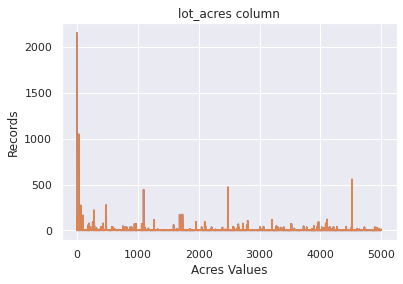

In [9]:
#discovering the NAN percentage
nan_count = data.isna().sum()
print(nan_count) # I see only lot_acres has NAN numbers

# what about percentage
nan_percentage = data.lot_acres.isna().sum() / len(data.lot_acres)

# I can see only 2% of the data are NAN so a good aproach would be drop it
print("The data base has " + str(nan_percentage*100.0) + "% of missing data in lot_acres") 

#however, there is a lot of 0 values in the lot_acres collunm so we can fill the NAN with 0
print("The data base has " + str(len(data[data.lot_acres==0])/len(data)*100.0) + "% of zero values in lot_acres") # 35 + 10 = 40 of 5000 = 7%
data = data.fillna(0)

# the biggest concentration is around zero
data.lot_acres.plot() 

#lets see if we drop the zero number
data_1 = data[data.lot_acres!=0]
# the distribution looks almost the same so lets keep the zeros
ax = data_1.lot_acres.plot()
ax.set_title("lot_acres column")
ax.set_xlabel("Acres Values")
ax.set_ylabel("Records")
# Moreover, there are a lot of None value in sqrt_f and garage filds. 
# None, by definition, forces object type, which basically disables all efficiency in numpy
# So let's replace None for zero
#data.fillna(0, inplace=True) # Acttually looks like None is a string
data = data.replace("None", np.nan)
# for HOA group by zip code, create a dictionary and replace by lambda
data['HOA'] = data['HOA'].str.replace(',', '')
data["HOA"] = pd.to_numeric(data["HOA"])
data["sqrt_ft"] = pd.to_numeric(data["sqrt_ft"])
grouped_zip = data.groupby("zipcode").mean()
dic = grouped_zip.to_dict()
print(dic['HOA'])

#replace NAN values based on dictionary values
data['HOA'] = data['HOA'].fillna(data['zipcode'].map(dic['HOA']))
data['HOA'] = data['HOA'].fillna(0)
data['sqrt_ft'] = data['sqrt_ft'].fillna(data['zipcode'].map(dic['sqrt_ft']))

data["garage"] = pd.to_numeric(data["garage"])
data['garage'] = data['garage'].fillna(0)

data.head()


#Breaking Down Features

It has been a little hard to extract the feature.

Therefore, we need to discuss wich features are really important for the business.

Future works: extract fetures

In [ ]:
#let`s se how handle kitchen_features and floor_covering 

new_features_data = data['kitchen_features'].apply(lambda x: pd.Series(str(x).split(",")))

new_features = new_features_data[new_features_data.notnull().all(1)]

new_features_data = data['floor_covering'].apply(lambda x: pd.Series(str(x).split(",")))

new_features = new_features_data[new_features_data.notnull().all(1)]

print(new_features.drop_duplicates())

#We need to discuss wich features are really important for the business.

#Future works: extract fetures

           0              1          2                3               4  \
3379  Carpet   Ceramic Tile   Concrete   Indoor/Outdoor   Natural Stone   

           5  
3379   Vinyl  


#Exploratory Data Analysis​

Text(0, 0.5, 'Normalized Values')

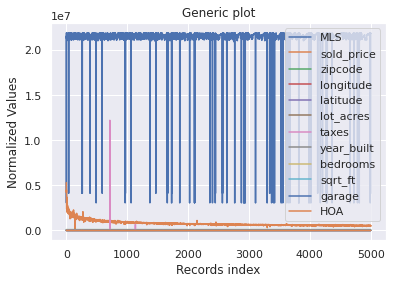

In [ ]:
# stating to see the overall distribution
ax = data.plot()
ax.set_title("Generic plot")
ax.set_xlabel("Records index")
ax.set_ylabel("Normalized Values")

Looking at the concentration area.

Text(0, 0.5, '')

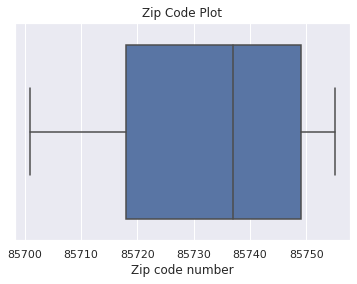

In [ ]:


#Looking at the concentration area.
ax = sns.boxplot(x=data['zipcode'], showfliers=False)
ax.set_title("Zip Code Plot")
ax.set_xlabel("Zip code number")
ax.set_ylabel("")

Looking at the houses' age

Text(0, 0.5, '')

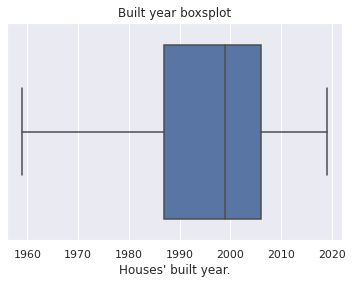

In [ ]:
#Looking at the houses' age.
ax = sns.boxplot(x=data['year_built'], showfliers=False)
ax.set_title("Built year boxsplot")
ax.set_xlabel("Houses' built year.")
ax.set_ylabel("")

Looking at the correlations

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sold_price  5000 non-null   float64
 1   zipcode     5000 non-null   int64  
 2   lot_acres   5000 non-null   float64
 3   taxes       5000 non-null   float64
 4   year_built  5000 non-null   int64  
 5   bedrooms    5000 non-null   int64  
 6   sqrt_ft     5000 non-null   float64
 7   garage      5000 non-null   float64
 8   fireplaces  5000 non-null   object 
 9   HOA         5000 non-null   float64
dtypes: float64(6), int64(3), object(1)
memory usage: 429.7+ KB


<AxesSubplot:>

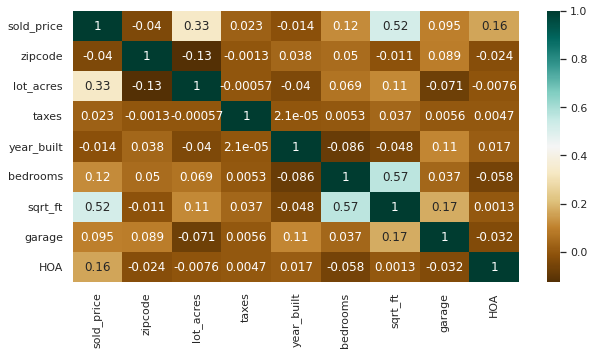

In [11]:
#droping no interesting columns
data = data.drop(['MLS','longitude','latitude','bathrooms','kitchen_features','floor_covering'],axis=1)
data.info()
plt.figure(figsize=(10,5))
c= data.corr()
sns.heatmap(c, cmap='BrBG', annot=True)